In [1]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

import seaborn as sns
# Reset default params
sns.set()

# Set context to `"paper"`
sns.set_context("paper")
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# plt.rcParams['figure.figsize'] = (10, 6)
# plt.rcParams['font.size'] = 14

from pandas.plotting import parallel_coordinates

# Use Matplotlib defaults
plt.style.use("seaborn")

In [2]:
# Check the available styles
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 '_classic_test']

In [3]:
location1 = r"E:\\MYLEARN\\2-ANALYTICS-DataScience\\datasets\\gdp.csv"
location2 = r"E:\\MYLEARN\\2-ANALYTICS-DataScience\\datasets\\iris.csv"
location3 = r"E:\\MYLEARN\\2-ANALYTICS-DataScience\\datasets\\tips.csv"

In [4]:
df_gdp = pd.read_csv(location1)
df_iris = pd.read_csv(location2)
df_tips = pd.read_csv(location3)

In [5]:
df_gdp.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [6]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


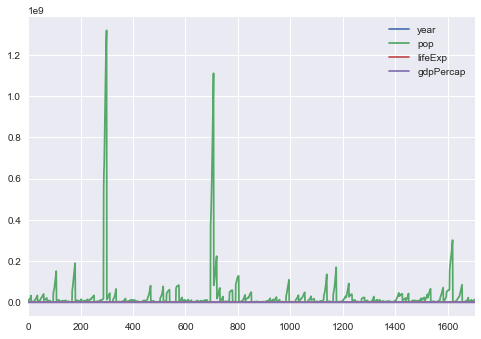

In [8]:
# If we graph using just .plot, it’s going to use the row/index number 
# as the X axis on the chart.

# the plot makes no clear sense
df_gdp.plot()

In [9]:
# average gdp per capita for each country, for Asia
# When you do a groupby and summarize a column, you get a Series, 
# not a dataframe.
# Notice the series has index as country name
df_cntry = df_gdp[df_gdp['continent']=='Asia'].groupby("country")['gdpPercap'].mean()
df_cntnt = df_gdp.groupby("continent")['gdpPercap'].mean()

In [10]:
df_cntnt.head()

continent
Africa       2193.754578
Americas     7136.110356
Asia         7902.150428
Europe      14469.475533
Oceania     18621.609223
Name: gdpPercap, dtype: float64

Text(0.5,0,'Year')

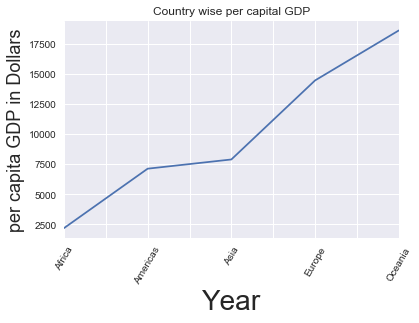

In [11]:
# df_gdp[df_gdp['continent']=='Asia'].groupby("country")['gdpPercap'] \
#                            .mean() \
#                            .plot(kind='line', figsize=(20,10));

ax = df_cntnt.plot(kind='line', figsize=(6,4), rot=60)

# add a title
ax.set_title("Country wise per capital GDP")

# add a label to the y-axis
ax.set_ylabel("per capita GDP in Dollars", fontsize=18)

# add a label to the x-axis
ax.set_xlabel("Year", fontsize=28)


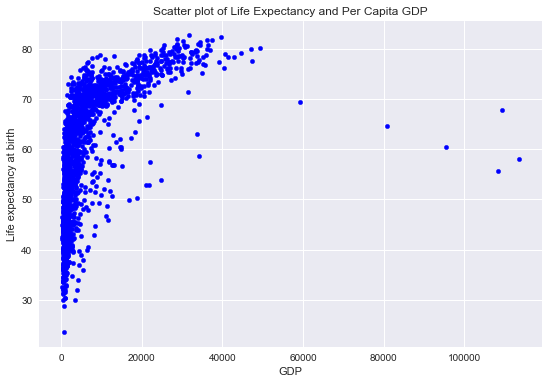

In [12]:
ax = df_gdp.plot(kind='scatter', 
        x='gdpPercap', 
        y='lifeExp', 
        figsize=(9,6),
        title= 'Scatter plot of Life Expectancy and Per Capita GDP',
        grid=True,
        legend=True,
        color='blue',
        
       );
# Set the x-axis label
ax.set_xlabel("GDP")

# Set the y-axis label
ax.set_ylabel("Life expectancy at birth");

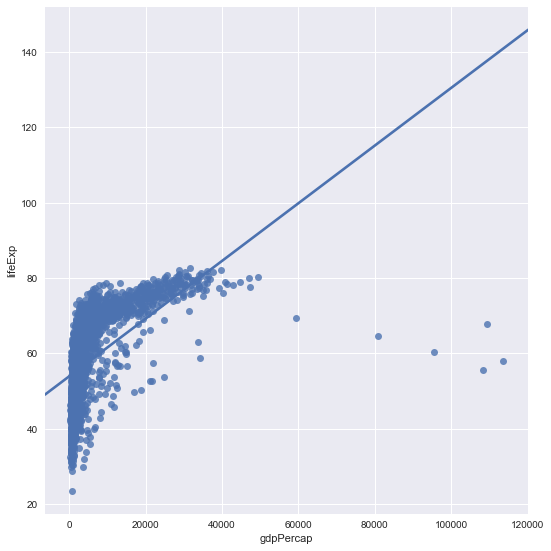

In [13]:
sns.lmplot(x='gdpPercap', y='lifeExp', data=df_gdp, ci=None, size=8, aspect=1);

In [14]:
# plot bar graphs for gdppercapita of India

# get the data for India, gets the slice off the main df
df_india = df_gdp.loc[df_gdp['country']=='India']

# this one does not reindex the dataframe but returns
#df_india.reset_index(drop=True)

# The drop argument on the reset_index(drop=True) restricts the function from inserting the 
# old index as a column in the resulting DataFrame.
df_india = df_india.reset_index(drop=True)

# sort this by year
df_india.sort_values('year', ascending=True, inplace=True)

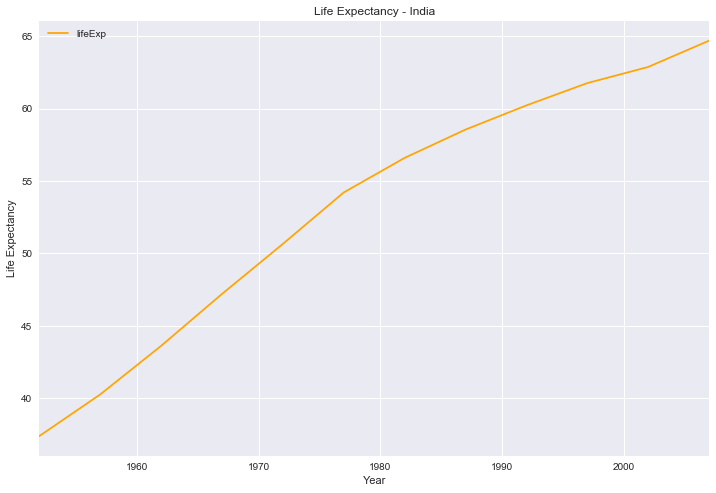

In [15]:
# kind='bar' or 'barh'
ax = df_india.plot(kind='line', 
        x='year', 
        y=['lifeExp'],
        figsize=(12,8),
        title= 'Life Expectancy - India',
        grid=True,
        legend=True,
        color='orange',    
       );
# Set the x-axis label
ax.set_xlabel("Year")

# Set the y-axis label
ax.set_ylabel("Life Expectancy");

In [50]:
# plot line graphs for lifeExp of few countries

# get the data for India, gets the slice off the main df
countries = ['India','China', 'Japan', 'Singapore', 'Pakistan']
countries = ['India', 'China']

df_asia = df_gdp[df_gdp.country.isin(countries)]

# The drop argument on the reset_index(drop=True) restricts the function from inserting the 
# old index as a column in the resulting DataFrame.
df_asia = df_asia.reset_index(drop=True)

# sort this by year
df_asia.sort_values(['country', 'year'], ascending=True, inplace=True)

In [52]:
df_asia.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,China,1952,556263528.0,Asia,44.00000,400.448611
1,China,1957,637408000.0,Asia,50.54896,575.987001
2,China,1962,665770000.0,Asia,44.50136,487.674018
3,China,1967,754550000.0,Asia,58.38112,612.705693
4,China,1972,862030000.0,Asia,63.11888,676.900092


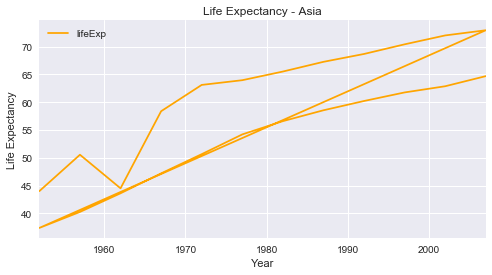

In [51]:
ax = df_asia.plot(kind='line', 
        x='year', 
        y=['lifeExp'],
        figsize=(8,4),
        title= 'Life Expectancy - Asia',
        grid=True,
        legend=True,
        color='orange',    
       );
# Set the x-axis label
ax.set_xlabel("Year")

# Set the y-axis label
ax.set_ylabel("Life Expectancy");

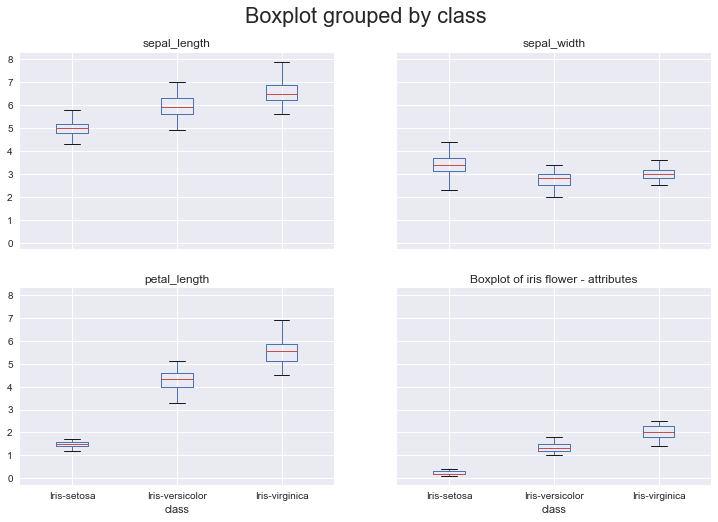

In [88]:
# box plot (iris)

# Given that the input variables are numeric, we can create box and whisker 
# plots of each.

#df_iris.boxplot(column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], figsize=(12,5), grid=True)
ax = df_iris.boxplot(
        column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
        by='class',
        figsize=(12, 8),     
        grid=True 
       );

plt.title("Boxplot of iris flower - attributes");

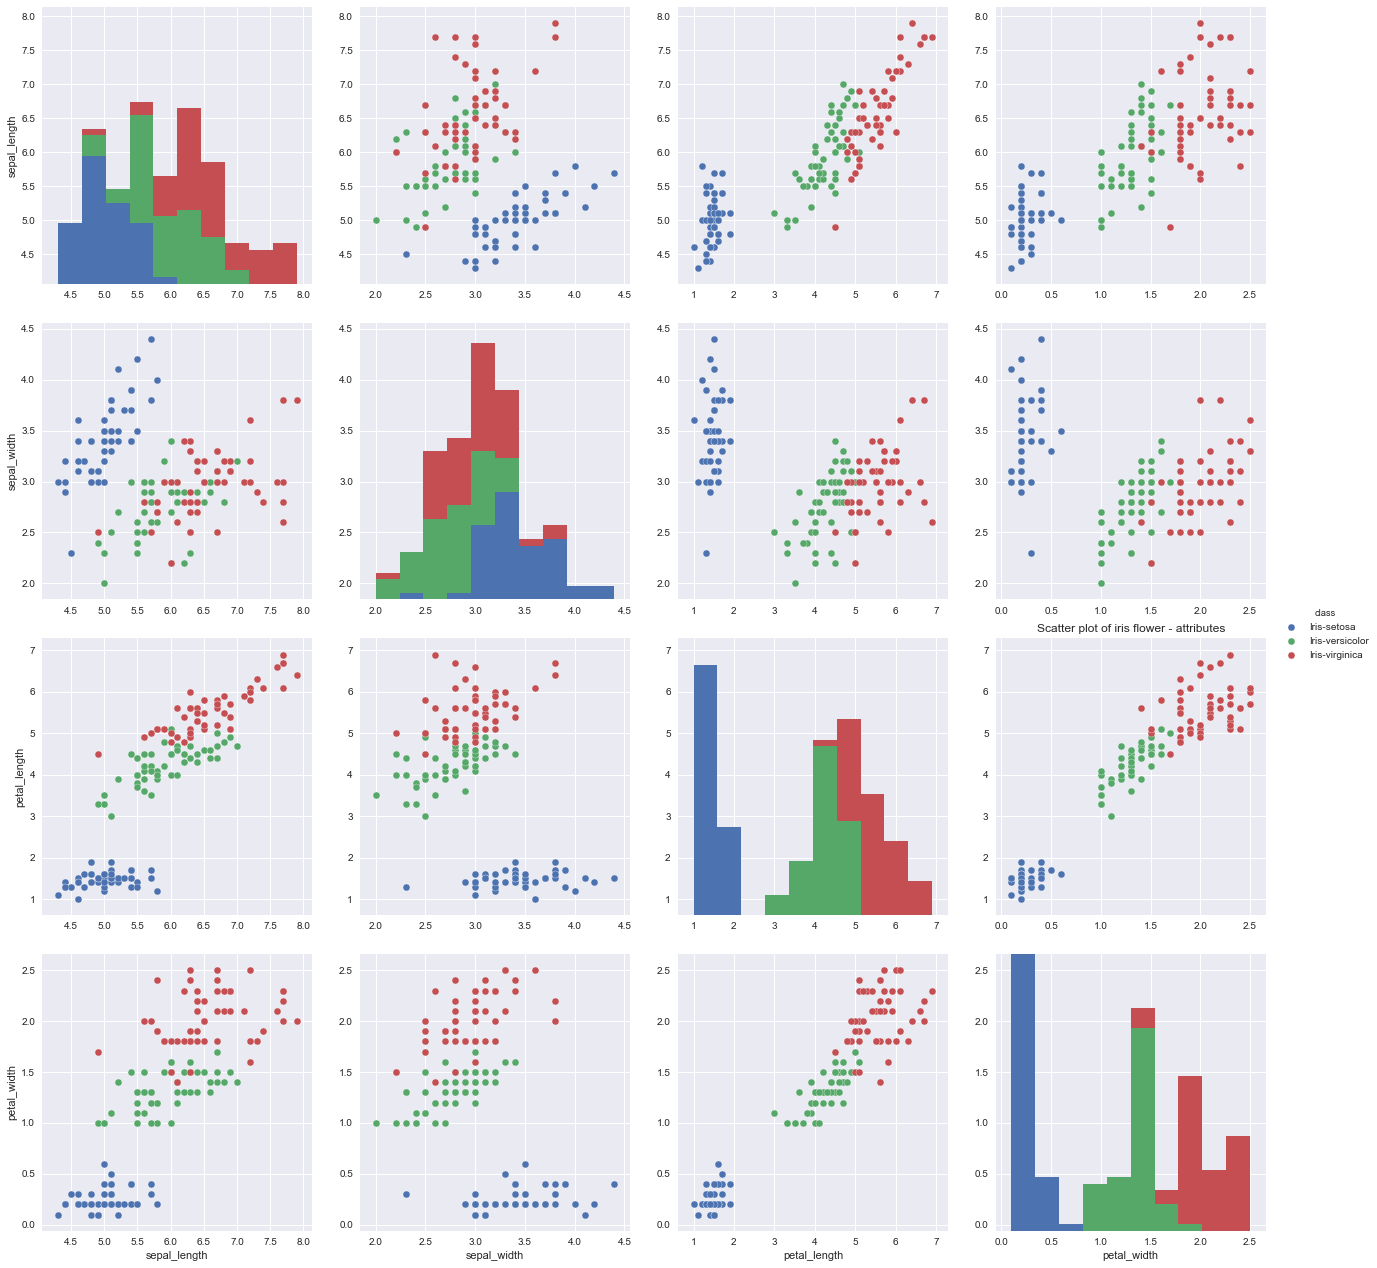

In [91]:
# pair plots
sns.pairplot(df_iris, hue='class', size=4.5); diag_kind="hist"

plt.title("Scatter plot of iris flower - attributes");

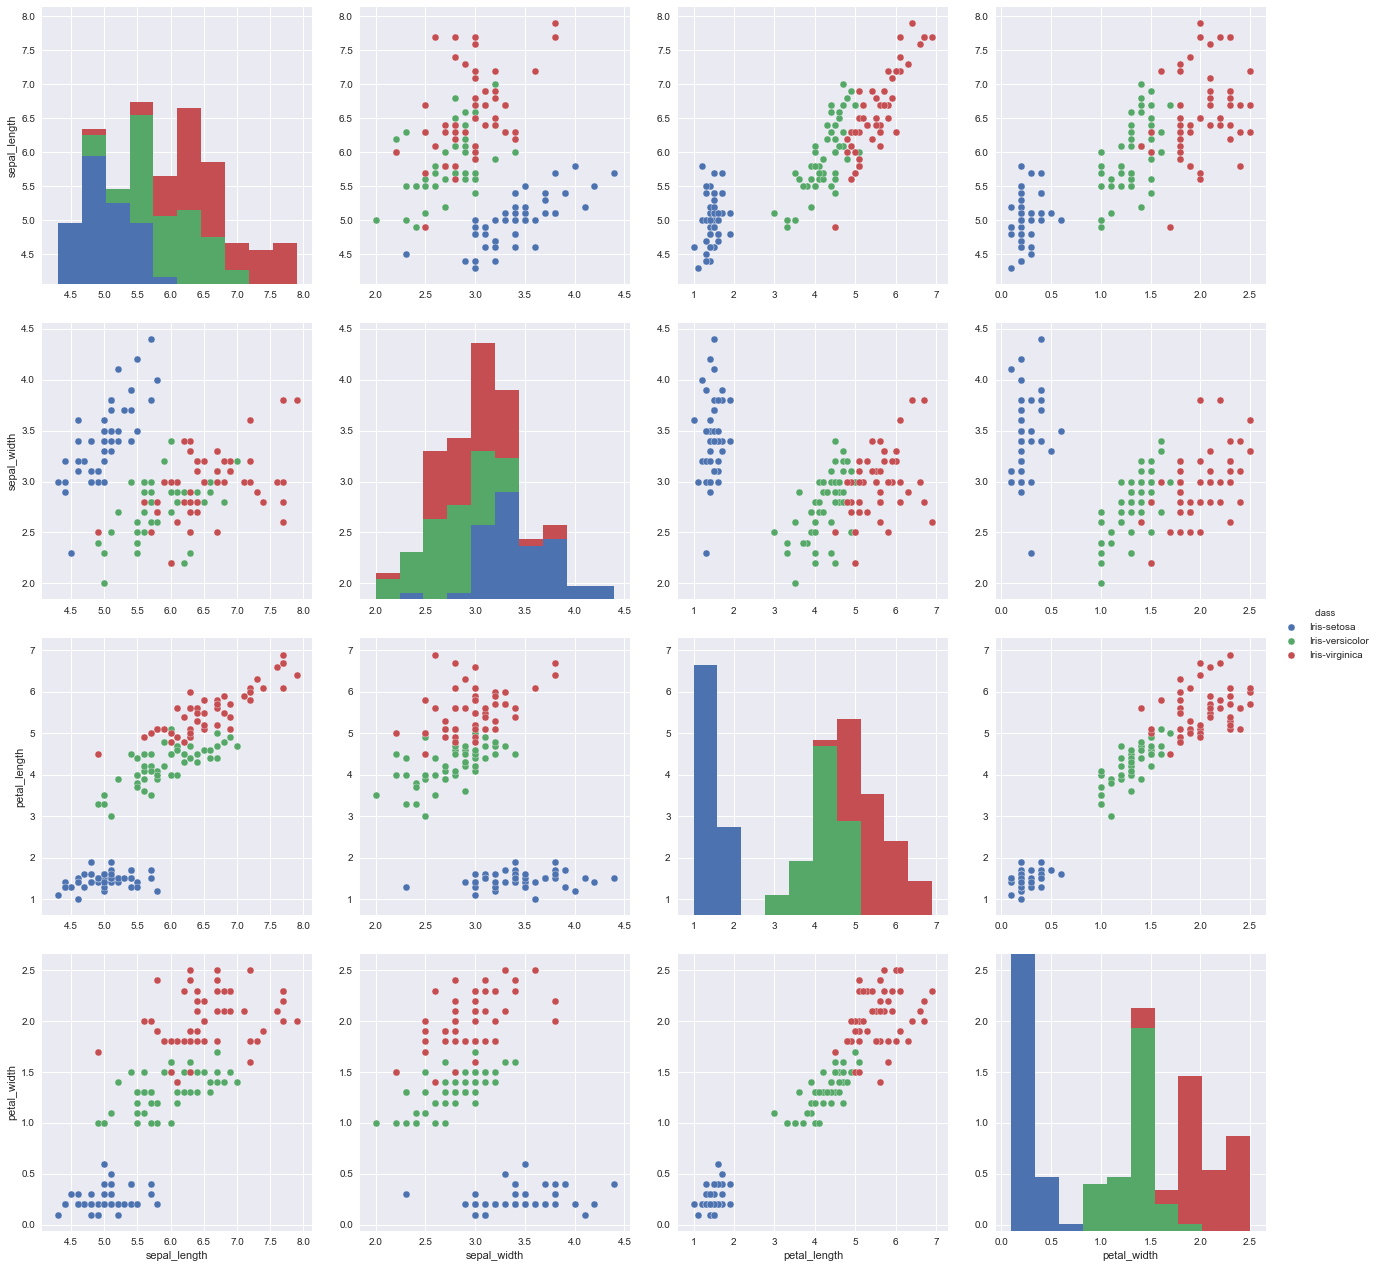

In [90]:
# pair plots
sns.pairplot(df_iris, hue='class', size=4.5, diag_kind="hist");

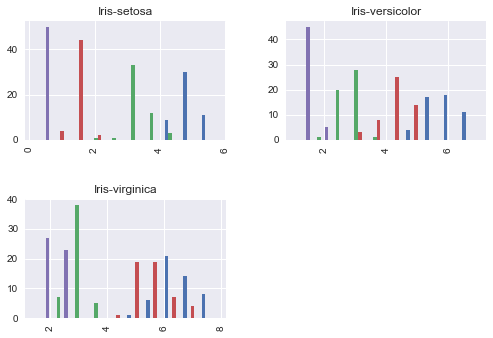

In [55]:
# histograms
df_iris.hist(column=['sepal_length', 'petal_length'], 
                  by='class',
                  grid=True
                 );

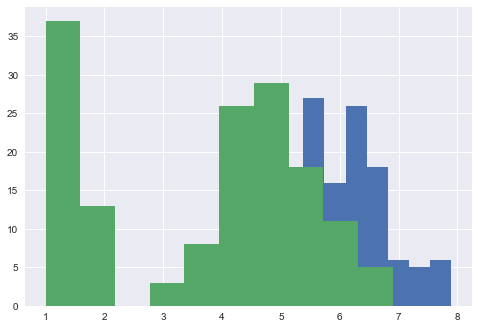

In [281]:
df_iris['sepal_length'].hist()
df_iris['petal_length'].hist()

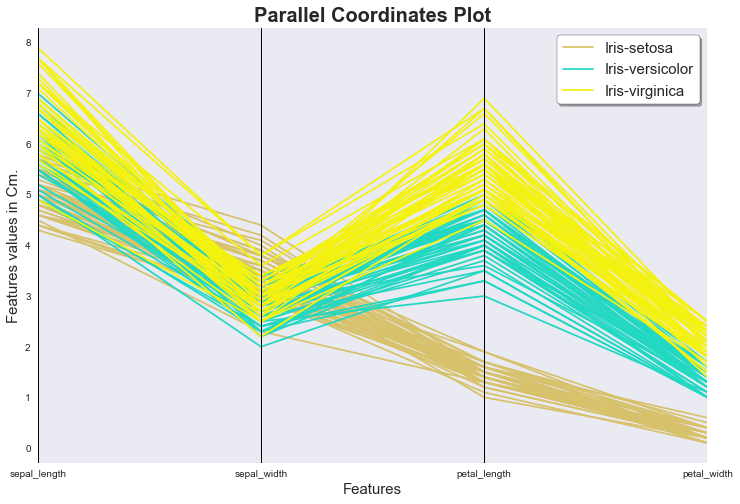

In [241]:
# parallel coordinate
plt.figure(figsize=(12,8))
parallel_coordinates(df_iris, "class")
plt.title('subplot 1')
plt.ylabel('Damped oscillation')                     
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values in Cm.', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")

plt.show()